In [35]:
import pandas as pd

df = pd.read_csv("/Users/yuki.tatsuoka/Downloads/house-prices-advanced-regression-techniques (1)/train.csv")

# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。



In [36]:
X = pd.concat([df["GrLivArea"],df["YearBuilt"]], axis=1)
y = df["SalePrice"]

# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [37]:
X = X.to_numpy()
y = y.to_numpy()

2725908099.063638


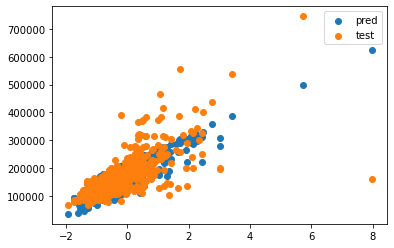

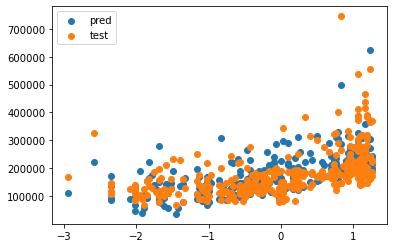

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 分割
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 標準化
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# 線形アルゴリズム
model = LinearRegression().fit(X_train_norm, y_train)

# 推定と評価
pred = model.predict(X_test_norm)
score_linear = mean_squared_error(pred, y_test)
print(score_linear)

# 図
plt.scatter(x=X_test_norm[:,0], y=pred, label="pred")
plt.scatter(x=X_test_norm[:,0], y=y_test, label="test")
plt.legend()
plt.show()

plt.scatter(x=X_test_norm[:,1], y=pred, label="pred")
plt.scatter(x=X_test_norm[:,1], y=y_test, label="test")
plt.legend()
plt.show()


# 問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


線形回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

6943346839.259772


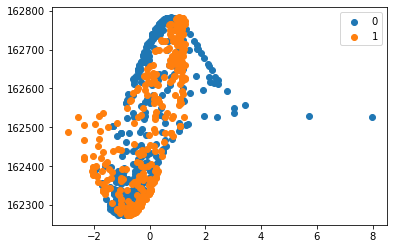

In [40]:
# SVR
from sklearn.svm import SVR

# 学習と推定と評価
model_svr = SVR().fit(X_train_norm, y_train)
pred_svr = model_svr.predict(X_test_norm)
score_svr = mean_squared_error(pred_svr, y_test)
print(score_svr)

# 図式化
plt.scatter(X_test_norm[:,0], pred_svr, label="0")
plt.scatter(X_test_norm[:,1], pred_svr, label="1")
plt.legend()

2856527053.941857


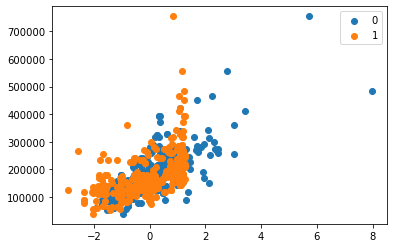

In [41]:
# 回帰木
from sklearn.tree import DecisionTreeRegressor

# 学習と推定と評価
model_tree = DecisionTreeRegressor().fit(X_train_norm, y_train)
pred_tree = model_tree.predict(X_test_norm)
score_tree = mean_squared_error(pred_tree, y_test)
print(score_tree)



# 図式化
plt.scatter(X_test_norm[:,0], pred_tree, label="0")
plt.scatter(X_test_norm[:,1], pred_tree, label="1")
plt.legend()

1841127614.7254221


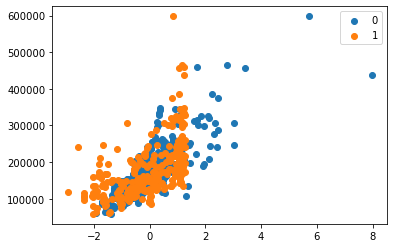

In [42]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

# 学習と推定と評価
model_rf = RandomForestRegressor().fit(X_train_norm, y_train)
pred_rf = model_rf.predict(X_test_norm)
score_rf = mean_squared_error(pred_rf, y_test)
print(score_rf)

# 図式化
plt.scatter(X_test_norm[:,0], pred_rf, label="0")
plt.scatter(X_test_norm[:,1], pred_rf, label="1")
plt.legend()

In [43]:
# 指標値(評価指標)
score_merge = np.array([score_linear, score_rf, score_svr, score_tree]).reshape(-1,1)
score_merge = pd.DataFrame(score_merge, index=["linear","rf", "svr", "tree"], columns=["評価指標"])

score_merge

'''
考察
MSEでは１番rfの値が低いのでランダムフォレストの精度が高い。
図では、アルゴリズムがほとんど同じな決定木とランダムフォレストの点は同じように見える。
また、SVRでは非線形の回帰に対応しているため、多項式回帰のような点線の動きをしている。
最も点に変化が少なく単純な動きをしているのは重回帰分析
'''

'\n考察\nMSEでは１番rfの値が低いのでランダムフォレストの精度が高い。\n図では、アルゴリズムがほとんど同じな決定木とランダムフォレストの点は同じように見える。\nまた、SVRでは非線形の回帰に対応しているため、多項式回帰のような点線の動きをしている。\n最も点に変化が少なく単純な動きをしているのは重回帰分析\n'

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。


House Prices: Advanced Regression Techniques | Kaggle



In [44]:
# 欠損値
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [45]:
# オブジェクト型と、他に分ける
quantitve = [x for x in missing.index if df.dtypes[x] != object]
objective = [x for x in missing.index if df.dtypes[x]  == object]
df[quantitve].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [46]:
df[objective].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [50]:
# オブジェクト以外は欠損値を平均値で埋める
df.fillna(df[quantitve].mean(), inplace=True)

# オブジェクト型はNAで埋める
df.fillna("NA", inplace=True)
df.isnull().sum().sum()

0

In [52]:
# ダミー変数の作成
df = pd.get_dummies(df)
df.shape

(1460, 306)

In [67]:
X = df
y = df["SalePrice"]

# 分割
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 標準化
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# 線形アルゴリズム
model = LinearRegression().fit(X_train_norm, y_train)

# 推定と評価
pred = model.predict(X_test_norm)
score_linear = mean_squared_error(pred, y_test)
print("MSEの値は{}".format(score_linear))


'''
考察
特徴量が２つの中、
前：2725908099.063638
今：176.49527020311882
大分緩和されている。
'''


MSEの値は176.49527020311882


'\n考察\n特徴量が２つの中、\n前：2725908099.063638\n今：176.49527020311882\n大分緩和されている。\n'